## 1. 非一様乱数を生成する

区間$[0,1]$ の一様乱数の確率密度関数

\begin{equation*}
f(x) =1 (0 \le x \le1), \ 0 (その他)   \tag{1} 
\end{equation*}

から，任意の確率密度関数 $g(t(x))$ を持つ非一様乱数を与えるための $t$ と $x$ の関係,

\begin{equation*}
t=w(x)  \tag{2} 
\end{equation*}

を求めたい。まず，"確率の保存"の要請から，

\begin{equation*}
f(x)dx=g(t)dt  \tag{3} 
\end{equation*}

である。式(1)を用いると

\begin{equation*}
dx = g(t)dt \Leftrightarrow x(t) = \int_{−∞}^{t}  g(t')dt'+C    \tag{3'} 
\end{equation*}



を得る。ここで， $C$ は積分定数である。十分条件として$x(−∞)=C=0$ ととる。

このとき
$\int_{−∞}^{∞} g(t')dt'=1$
であるから，  $x(∞)=1$となる。


以上から， $x$ と $t$ の関係は

\begin{equation*}
x(t)=\int_{−∞}^{t}  g(t')dt'  \tag{4}
\end{equation*}

によって結ばれていることがわかる。<br>
$g(t)$ は与えるものである。ここから $t$ を$x$ の関係として求め式(2)の $w(x)$ を決定すれば(逆関数を求めれば)，<br>
そのtは非一様分布 $g(t)$ を与える確率変数となる。

以上が任意の確率分布 $g(t)$ に従う乱数を発生させる手続きである。


## 2. 今回確認する分布

(1) 指数関数的な分布
$g(t) = exp(−t) (t>0),  0 (t< 0))$
に従う非一様乱数を求める。

(2) 平均値が $t_{av}$, 標準偏差が$σ$ のガウス分布にしたがう非一様乱数を求める。<br>
通常の方法では逆関数を求めることが難しいため，2次元平面での関数密度を<br>
極座標に変換するボックス-ミュラー法を用いる。


###  2.1 指数分布　

式(4)を用いる。

\begin{equation*}
x(t)=\int_{−∞}^{t}  g(t')dt'=\int_{0}^{t} exp(-t') dt' = 1- exp(-t)
\end{equation*}

であるから，ここから $t$ を $x$ の関数として求めると

\begin{equation*}
t=w(x)=- ln(1-x) \tag{5}
\end{equation*}

を得る。$[0,1]$ の一様乱数を $x$ に与えると，式(5)によって $t$ の分布が決まり，<br>
それらは指数関数 $g(t)=exp(-t)$ として分布するのである。

それを以下のプログラムで確かめよう。

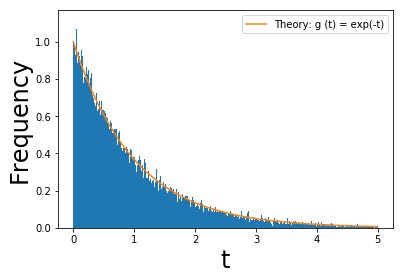

In [5]:
"""
x=[0,1]の一様乱数から指数関数型の非一様分布に従う乱数の発生
"""

from random import random
import numpy as np
from math import log

import matplotlib.pyplot as plt

# 1. [0,1]の一様乱数のデータ点数 (N->∞で頻度分布が確率密度関数となる)
data_list=[]
N=10**6  

for n in range(N):
    x=random()
    t=-log(1-x) # x->t への変換: t = -log(1-x)
    data_list.append(t)

#plot
fig=plt.figure()
ax=fig.add_subplot(111)

Nbins=int(N/100)
# [0,5]の範囲でNbins等分した規格化された棒グラフの作成
ax.hist(data_list, range=(0,5),bins=Nbins,normed=True) 

# 2. 理論確率密度分布 y = exp(-x)
xx=np.linspace(0,5,100)
yy=np.exp(-xx)
plt.plot(xx,yy, label='Theory: g (t) = exp(-t)')
plt.legend(loc='best')

plt.xlabel('t',size=24)
plt.ylabel('Frequency', size=24)

plt.show()

$x=[0,1]$ で100万点サンプルしたものから式(5)を用いて $t$ を生成しそれの頻度分布を描いたもの。<br>
理論曲線 $g(t)=exp(−t)$ を再現していることが分かる。


###  2.2 ガウス分布

平均値 $t_{av}$, 標準偏差 $σ$ のガウス分布

\begin{equation*}
g(t)= \frac{1}{\sqrt{2 \pi \sigma^2}} \  exp(\frac{-(t-t_{av})^2}{2 \sigma^2})
\end{equation*}

を<a href="https://goo.gl/TSj4Yq">ボックス-ミュラー法</a>により生成する。

2つの一様乱数変数 $x$ と $y$ から，この場合は2つの独立なガウス分布を持つ非一様乱数に従う<br>
変数 $t_1$ と $t_2$ が得られる。

\begin{equation*}
t_1 = \sigma \ [(-2ln(x))^{1/2} \ cos(2 \pi y)+t_{av}   ]
\end{equation*}

\begin{equation*}
t_2 = \sigma \ [(-2ln(x))^{1/2} \ sin(2 \pi y)+t_{av}   ]
\end{equation*}

これを確かめてみよう。

以下のコードは $σ=1,t_{av}=10$ としてモンテカルロシミュレーションを行ったものである。

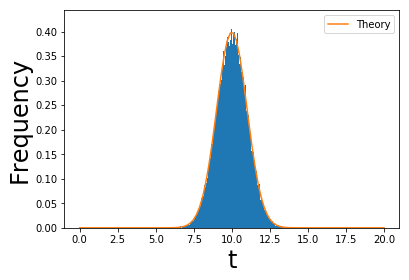

In [6]:
"""
ガウス分布を生成する非一様乱数
ボックス-ミュラーの方法
"""

from random import random
from math import cos, sin, pi, log, sqrt
import numpy as np
import matplotlib.pyplot as plt

data_list1=[]
#data_list2=[]

N=10**5 # [0,1]の一様乱数のデータ点数 (N->∞で頻度分布が確率密度関数となる)

sigma=1.0 #標準偏差
ave=10   # 平均値
for n in range(N):
    x1=random()
    x2=random()
    t1=sigma*((-2*log(x1))**(1/2))*(cos(2*pi*x2))+ave             #x->t への変換:
    t2=sigma*((-2*log(x1))**(1/2))*(sin(2*pi*x2))+ave             #x->t への変換:

    data_list1.append(t1)
#    data_list2.append(t2)

#plot
fig=plt.figure()
ax=fig.add_subplot(111)

Nbins=int(N/100)
#ax.hist(data_list, range=(0,10),bins=Nbins,normed=True) 
# [0,5]の範囲でNbins等分した規格化された棒グラフの作成
"""
[0,∞]のガウス分布にして正規化してしまうと，本来の積聞値が0.5なのに
1にするため数値が頻度が二倍に勘定されてしまうことに注意! 
平均値を大きめにすると良い.
"""

# [0,5]の範囲でNbins等分した規格化された棒グラフの作成 
ax.hist(data_list1, range=(0,20),bins=Nbins,normed=True) 

#ax.hist(data_list2, range=(0,20),bins=Nbins,normed=True) 
# [0,5]の範囲でNbins等分した規格化された棒グラフの作成 


# 理論確率密度分布 
xx=np.linspace(0,20,100)
yy=(1/sqrt(2*pi*sigma**2))*np.exp((-(xx-ave)**2)/(2*sigma**2)) # ガウス分布
plt.plot(xx,yy, label='Theory')
plt.legend(loc='best')

plt.xlabel('t',size=24)
plt.ylabel('Frequency', size=24)

plt.show()

オレンジの線が理論曲線(ガウス関数)である。<br>
頻度分布がガウス分布を再現していることがわかる。